In [4]:
import  pandas  as  pd
import  numpy   as  np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import normalize,MinMaxScaler,PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2


In [5]:
df = pd.read_csv("risk_factors_cervical_cancer.csv", usecols = ['Age', 'Number of sexual partners', 'First sexual intercourse',\
                          'Num of pregnancies',  'Smokes',  'Smokes (years)',  'Smokes (packs/year)',  'Hormonal Contraceptives',\
                          'Hormonal Contraceptives (years)',  'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',\
                          'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',\
                          'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum',\
                          'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',\
                          'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann'])

## replace ? with NaN
df = df.replace('?', np.NaN)
df1=df.copy()

In [6]:
df=df.convert_objects(convert_numeric=True)
df1=df1.convert_objects(convert_numeric=True)

# model 

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

### To handle Nan we have to see correlation between variables. But according to data, size higher than 100 NaN values can be effect data. We can fill features which have lower than 100 Nan values with median values.

In [8]:
df1['First sexual intercourse'].fillna(df1['First sexual intercourse'].median(), inplace = True)
df1['Num of pregnancies'].fillna(df1['Num of pregnancies'].median(), inplace = True)
df1['First sexual intercourse'].fillna(df1['First sexual intercourse'].median(), inplace = True)
df1['Smokes'].fillna(0,inplace = True)
df1['Number of sexual partners'].fillna(df1['Number of sexual partners'].median(), inplace = True)
l = (df1['Smokes']==1)
df1.loc[l,'Smokes (years)'] = df1.loc[l,'Smokes (years)'].fillna(df1.loc[l,'Smokes (years)'].median())
l = (df1['Smokes']==0)
df1.loc[l,'Smokes (years)'] = df1.loc[l,'Smokes (years)'].fillna(0)
l = (df1['Smokes']==1)
df1.loc[l,'Smokes (packs/year)'] = df1.loc[l,'Smokes (packs/year)'].fillna(df1.loc[l,'Smokes (packs/year)'].median())
l = (df1['Smokes']==0)
df1.loc[l,'Smokes (packs/year)'] = df1.loc[l,'Smokes (packs/year)'].fillna(0)
df2 = df1.drop(['Hinselmann'], axis = 1)


### 1.1)Hormonal Contraceptives (HC)

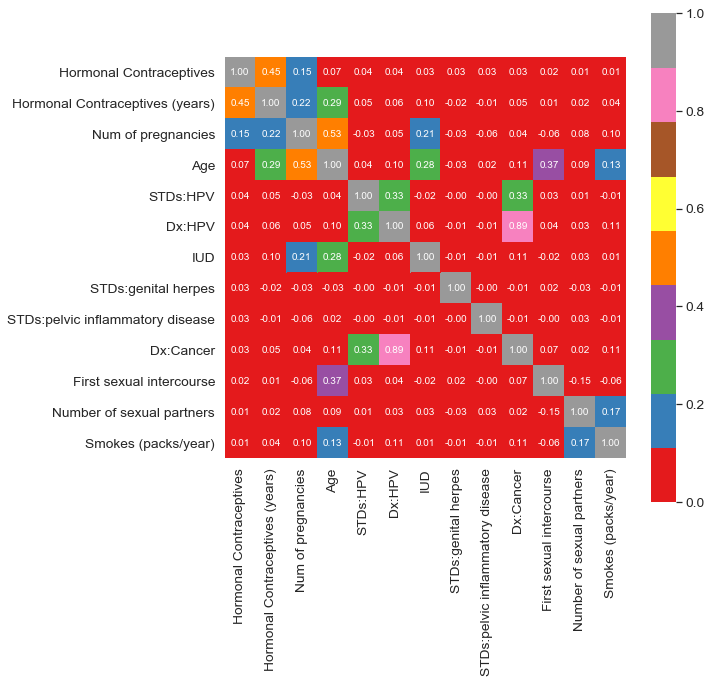

In [9]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Hormonal Contraceptives')['Hormonal Contraceptives'].index

cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap='Set1' ,annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()


In [10]:
# If patient is older than sample mean or number of pregnancies is lower than mean then patient may take Hormonal Contraceptives
l = (df2['Age']>df2['Age'].mean())
df2.loc[l,'Hormonal Contraceptives'] = df2.loc[l,'Hormonal Contraceptives'].fillna(1)
l = (df2['Num of pregnancies']<df2['Num of pregnancies'].mean())
df2.loc[l,'Hormonal Contraceptives'] = df2.loc[l,'Hormonal Contraceptives'].fillna(1)
df2['Hormonal Contraceptives'].fillna(0,inplace = True)

df2['Hormonal Contraceptives'].isnull().sum()

0

For HC(years) NaN values we can fill with median values by using HC feature.



In [11]:
l = (df2['Hormonal Contraceptives'] == 1)
df2.loc[l,'Hormonal Contraceptives (years)'] = df2.loc[l,'Hormonal Contraceptives (years)'].fillna(df2['Hormonal Contraceptives (years)'].median())
l = (df2['Hormonal Contraceptives'] == 0)
df2.loc[l,'Hormonal Contraceptives (years)'] = df2.loc[l,'Hormonal Contraceptives (years)'].fillna(0)

Also we need to check relationship between HC and HC (years)

In [12]:
len(df2[(df2['Hormonal Contraceptives'] == 1) & (df2['Hormonal Contraceptives (years)'] == 0) ])

0

In [13]:
len(df2[(df2['Hormonal Contraceptives'] == 0) & (df2['Hormonal Contraceptives (years)'] != 0) ])

0

### 1.2) IUD

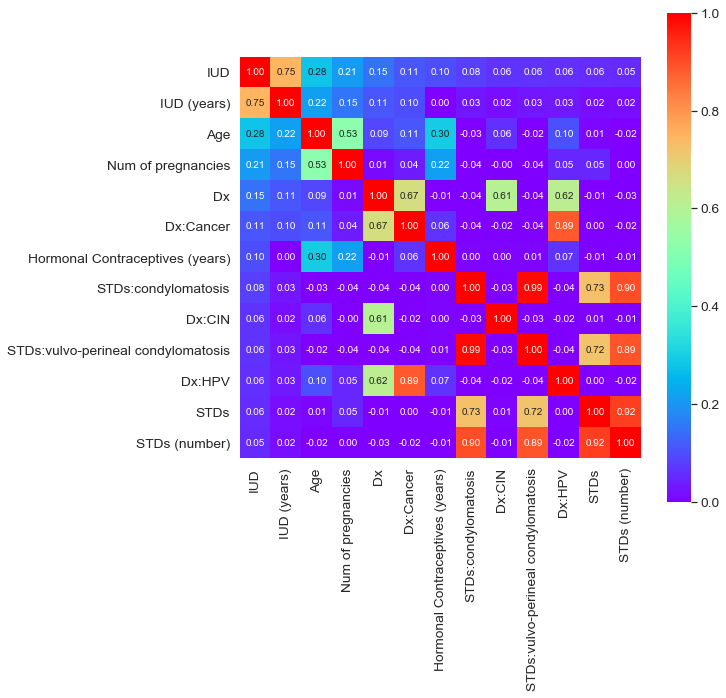

In [14]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'IUD')['IUD'].index

cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'rainbow', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

This figure show that Age and Number of pregnancies features have effect on IUD feature.

In [15]:
len(df2[(df2['Age']>df2['Age'].mean())&(df2['IUD']==1)])

66

In [16]:
len(df2[df2['IUD']==1])

83

This show that %80 of patients who take IUD are older than age mean. We can fillna values according to this discovery.

In [17]:
l = (df2['Age']>df2['Age'].mean())
df2.loc[l,'IUD'] = df2.loc[l,'IUD'].fillna(1)

len(df2[(df2['Num of pregnancies']<df2['Num of pregnancies'].mean())&(df2['IUD']==0)])

458

In [18]:
len(df2[df2['IUD']==0])

658

%70 of patients who do not take IUD have lower number of pregnancies than mean of number of pregnancies. We can fill remaining NaN with 0 values.

In [19]:
df2['IUD'].fillna(0, inplace = True)

For IUD (years) feature we can fill NaN values with IUD feature.

In [20]:
l = (df2['IUD'] == 1)
df2.loc[l,'IUD (years)'] = df2.loc[l,'IUD (years)'].fillna(df2['IUD (years)'].median())
l = (df2['IUD'] == 0)
df2.loc[l,'IUD (years)'] = df2.loc[l,'IUD (years)'].fillna(0)

Also we need to check relationship between IUD and IUD (years)

In [21]:
len(df2[(df2['IUD'] == 1) & (df2['IUD (years)'] == 0) ])

38

In [22]:
l = (df2['IUD'] == 1) & (df2['IUD (years)'] == 0)
df2.loc[l,'IUD (years)'] = df2['IUD (years)'].mean()

len(df2[(df2['IUD'] == 1) & (df2['IUD (years)'] == 0) ])

0

In [23]:
len(df2[(df2['IUD'] == 0) & (df2['IUD (years)'] != 0) ])

0

### 1.3)STDs

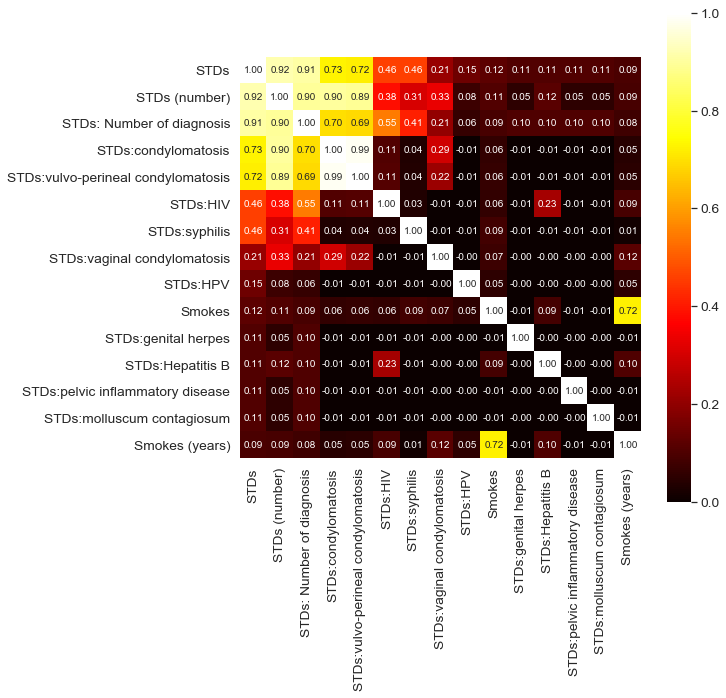

In [24]:
corrmat = df2.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'STDs')['STDs'].index

#cols =cols.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

cm = df2[cols].corr()

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap = 'hot', cbar=True, annot=True,vmin=0,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()


According to heatmap we can easily say that 'STDs:condylomatosis' and STDs:vulvo-perineal condylomatosis' features effect 'STDs'. We cannot take 'STD (number)' and 'STDs: Number of diagnosis' because they are same features as 'STDs'. According to our knowledge about STDs we can easily fill Nan values with 1 or zero because if patient have any of STDs diseases then patient STDs feature must be 1 others must be zero.

In [25]:
df3 = df2.copy()

l = (df3['STDs:condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:cervical condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:vaginal condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:vulvo-perineal condylomatosis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:syphilis']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:pelvic inflammatory disease']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:genital herpes']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:molluscum contagiosum']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:AIDS']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:HIV']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:Hepatitis B']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
l = (df3['STDs:HPV']==1)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

It seems that STDs and STD diseases features are paralel. According to that we have to look other features. Smokes and IUD features can be used.

In [26]:
len(df[(df3['STDs'] == 1)])

79

In [27]:
len(df3[(df3['Smokes'] == 0) & (df3['STDs'] == 1)])

58

According to data %73 of patients who are not smoking have STD. But not have Nan values

In [28]:
l = (df3['Smokes']==0)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)

len(df3[(df3['IUD'] == 0) & (df3['STDs'] == 1)])

127

In [29]:
len(df3[df3['STDs']==1])

168

%75 of patients who does not take IUD are also have STDs

In [30]:
l = (df3['IUD']==0)
df3.loc[l,'STDs'] = df3.loc[l,'STDs'].fillna(1)
df3['STDs'].fillna(0, inplace = True)

df3['STDs'].isnull().sum()

0

Also STDs (number) is same feature as STDs.

In [31]:
df3['STDs (number)'].median()

0.0

This case median is not useful so we can use mean values.

In [32]:
l = (df3['STDs']==1)
df3.loc[l,'STDs (number)'] = df3.loc[l,'STDs (number)'].fillna(df3['STDs (number)'].mean())
df3['STDs (number)'].fillna(0, inplace = True)

df3['STDs (number)'].isnull().sum()

0

### 1.4)STDs Diseases

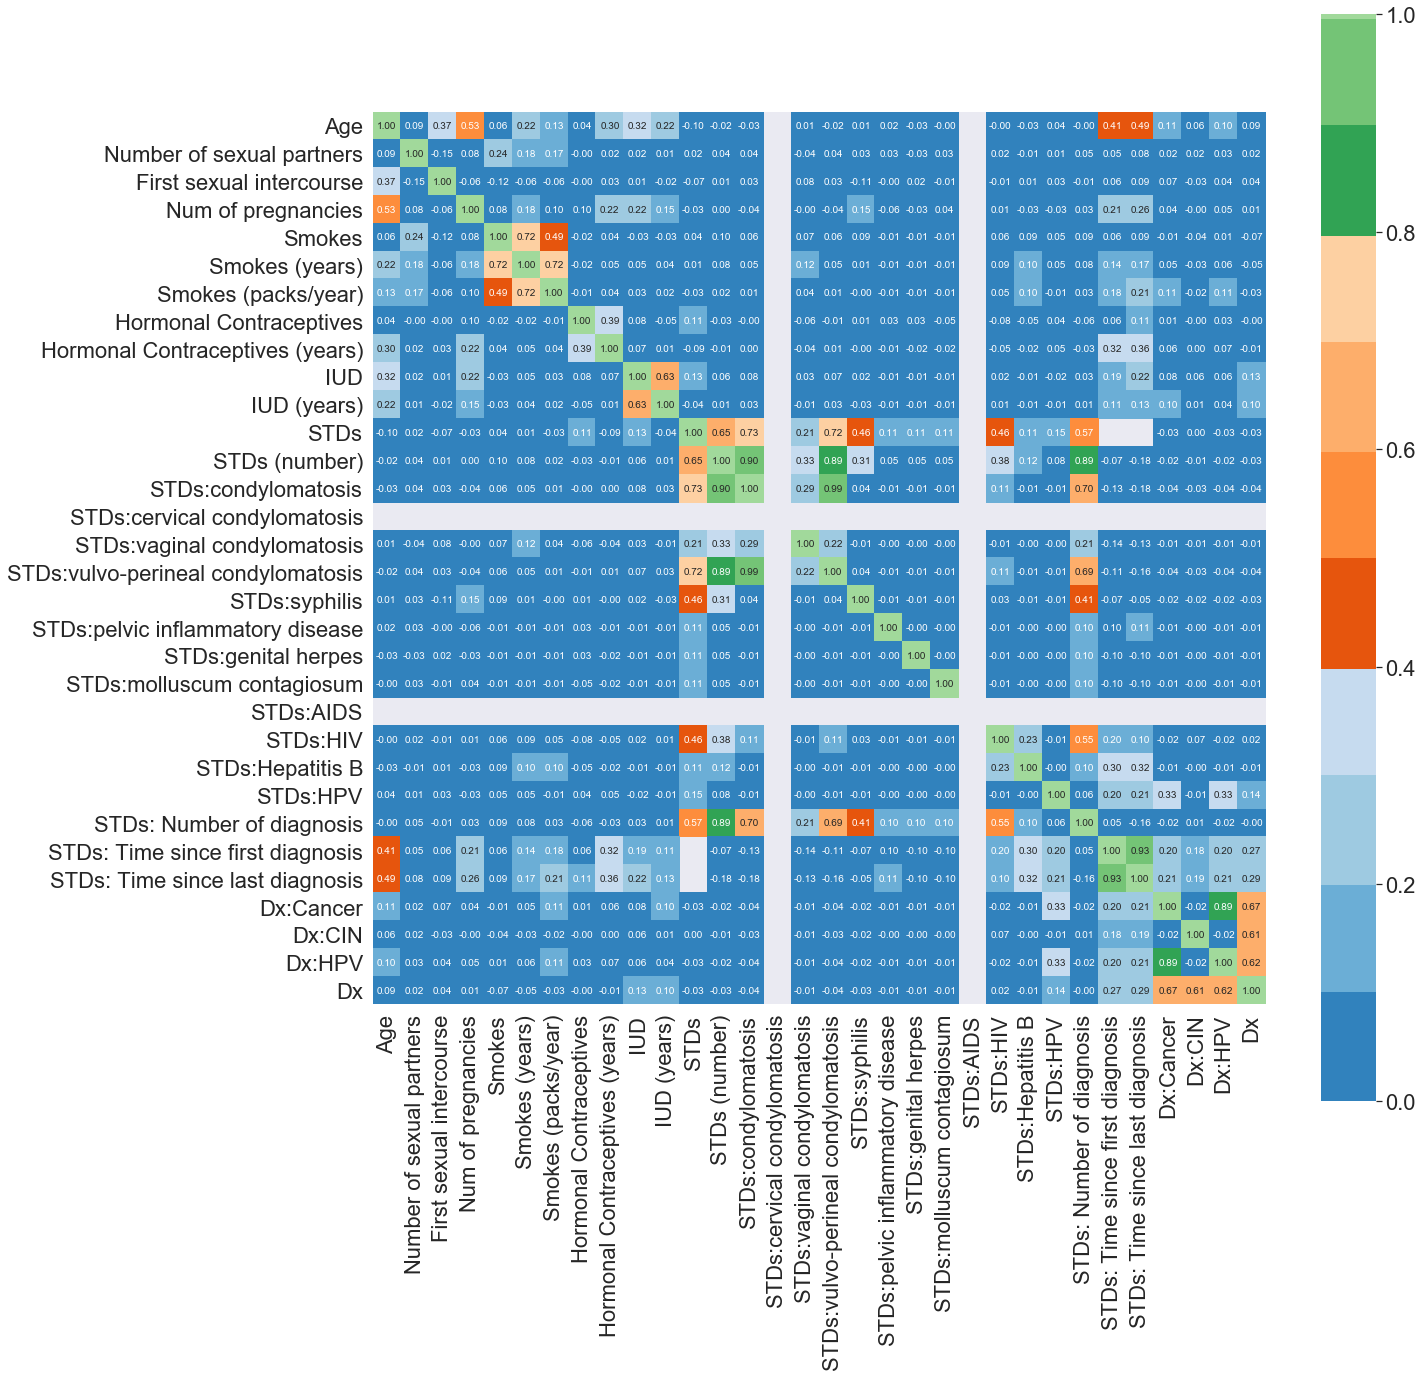

In [33]:
corrmat = df3.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=2)
hm = sns.heatmap(corrmat,cmap = 'tab20c', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 10},
             yticklabels = df3.columns, xticklabels = df3.columns)
plt.show()

In [34]:
df4= df3.copy()

According to heatmap and also our knowledge about field all STDs diseases depend on STDs feature and also STD (number).

In [35]:
l = (df4['STDs']==0)
df4.loc[l,'STDs:condylomatosis'] = df4.loc[l,'STDs:condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:cervical condylomatosis'] = df4.loc[l,'STDs:cervical condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:vaginal condylomatosis'] = df4.loc[l,'STDs:vaginal condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:vulvo-perineal condylomatosis'] = df4.loc[l,'STDs:vulvo-perineal condylomatosis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:syphilis'] = df4.loc[l,'STDs:syphilis'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:pelvic inflammatory disease'] = df4.loc[l,'STDs:pelvic inflammatory disease'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:genital herpes'] = df4.loc[l,'STDs:genital herpes'].fillna(0)
l = (df4['STDs']==0)
df4.loc[l,'STDs:molluscum contagiosum'] = df4.loc[l,'STDs:molluscum contagiosum'].fillna(0)

df4['STDs:molluscum contagiosum'].isnull().sum()

99

For other values we have to fill Nan values with median because all STDs depends on other STDs and also we cannot sure about person disease.

In [36]:
df4['STDs:condylomatosis'].fillna(df4['STDs:condylomatosis'].median(),inplace = True)
df4['STDs:cervical condylomatosis'].fillna(df4['STDs:cervical condylomatosis'].median(),inplace = True)
df4['STDs:vaginal condylomatosis'].fillna(df4['STDs:vaginal condylomatosis'].median(),inplace = True)
df4['STDs:vulvo-perineal condylomatosis'].fillna(df4['STDs:vulvo-perineal condylomatosis'].median(),inplace = True)
df4['STDs:syphilis'].fillna(df4['STDs:syphilis'].median(),inplace = True)
df4['STDs:pelvic inflammatory disease'].fillna(df4['STDs:pelvic inflammatory disease'].median(),inplace = True)
df4['STDs:genital herpes'].fillna(df4['STDs:genital herpes'].median(),inplace = True)
df4['STDs:molluscum contagiosum'].fillna(df4['STDs:molluscum contagiosum'].median(),inplace = True)

df4['STDs:condylomatosis'].isnull().sum()

0

### 1.5)AIDS

This feature correlation not show us any clue. But we know that AIDS also a STDs disease. Then we can fill NaN values as;

In [37]:
l = (df4['STDs']==0)
df4.loc[l,'STDs:AIDS'] = df4.loc[l,'STDs:AIDS'].fillna(0)
df4['STDs:AIDS'].fillna(df4['STDs:AIDS'].median(),inplace = True)

df4['STDs:AIDS'].isnull().sum()

0

### 1.6)STDs:HIV

In [38]:
len(df4[df4['STDs:HIV']==1])

18

In [39]:
len(df4[(df4['STDs:HIV']==1) & (df4['STDs']==1)])

18

%100 of patient who have STDs then they have STDs:HIV

In [40]:
l = (df4['STDs']==1)
df4.loc[l,'STDs:HIV'] = df4.loc[l,'STDs:HIV'].fillna(1)
df4['STDs:HIV'].fillna(0,inplace = True)

Cheking contradiction values;

In [41]:
len(df4[(df4['STDs']==0) & (df4['STDs:HIV'] == 1)])

0

In [42]:
df4['STDs:HIV'].isnull().sum()

0

### 1.7)STDs:Hepatitis B

This feature effect by STDs:HIV feature.

In [43]:
len(df4[df4['STDs:Hepatitis B']==1])

1

There is a one person who have disease. According to population this value is so minimal. We can fill Nan values with 0.

In [44]:
df4['STDs:Hepatitis B'].fillna(0, inplace = True)

df4['STDs:Hepatitis B'].isnull().sum()

0

### 1.8)STDs:HPV

But HPV's positive values are not enough. Null values cannot define by using important features. We can fill NaN values with 0.

In [45]:
df4['STDs:HPV'].fillna(0, inplace = True)

df4['STDs:HPV'].isnull().sum()

0

### 1.9)STDs: Time since first diagnosis and STDs: Time since last diagnosis

If patient STDs is zero then first diagnosis and last diagnosis cannot be a value. We can fill Nan values with this knowledge.

In [46]:
l = (df4['STDs']==1)
df4.loc[l,'STDs: Time since first diagnosis'] = df4.loc[l,'STDs: Time since first diagnosis'].fillna(df4['STDs: Time since first diagnosis'].median())
l = (df4['STDs']==1)
df4.loc[l,'STDs: Time since last diagnosis'] = df4.loc[l,'STDs: Time since last diagnosis'].fillna(df4['STDs: Time since last diagnosis'].median())
df4['STDs: Time since last diagnosis'].fillna(0, inplace = True)
df4['STDs: Time since first diagnosis'].fillna(0, inplace = True)

df4['STDs: Time since last diagnosis'].isnull().sum()

0

In [47]:
df4['Hinselmann']=df['Hinselmann']
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null float64
First sexual intercourse              858 non-null float64
Num of pregnancies                    858 non-null float64
Smokes                                858 non-null float64
Smokes (years)                        858 non-null float64
Smokes (packs/year)                   858 non-null float64
Hormonal Contraceptives               858 non-null float64
Hormonal Contraceptives (years)       858 non-null float64
IUD                                   858 non-null float64
IUD (years)                           858 non-null float64
STDs                                  858 non-null float64
STDs (number)                         858 non-null float64
STDs:condylomatosis                   858 non-null float64
STDs:cervical condylomatosis          858 non-null float64
STDs:vaginal

In [48]:
#df4.to_csv("cc_2.csv")

In [49]:
x=df4.drop("Hinselmann",axis=1)
y=df4['Hinselmann']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [50]:
#!pip install xgboost

In [51]:
#PPV & PRECISION
def print_ppv(y_test,preds):
    cm = confusion_matrix(y_test,preds)
    TP=cm[0][0]
    FP =cm[0][1]
    FN=cm[1][0]
    TN =cm[1][1]
    return(TP/(TP+FP))

In [52]:
#NPV
def print_npv(y_test, preds):
    cm = confusion_matrix(y_test,preds)
    TP=cm[0][0]
    FP =cm[0][1]
    FN=cm[1][0]
    TN =cm[1][1]
    return(TN/(TN+FN))

In [53]:
#RECALL and SENSITIVITY
def print_recall(y_test, preds):
    cm = confusion_matrix(y_test,preds)
    TP=cm[0][0]
    FP =cm[0][1]
    FN=cm[1][0]
    TN =cm[1][1]
    return(TP/(TP+FN))

In [54]:
#SENSITIVITY
def print_specificity(y_test, preds):
    cm = confusion_matrix(y_test,preds)
    TP=cm[0][0]
    FP =cm[0][1]
    FN=cm[1][0]
    TN =cm[1][1]
    return(TN/(TN+FP))

In [55]:
#F1 SCORE
def print_f1score(y_test, preds):
    cm = confusion_matrix(y_test, preds)
    TP=cm[0][0]
    FP =cm[0][1]
    FN=cm[1][0]
    TN =cm[1][1]
    Recall=TP/(TP+FN)
    Precision=TP/(TP+FP)
    return(2*(Recall * Precision) / (Recall + Precision))

In [56]:
#auc
def auc(y_test, preds):
        fpr, tpr, thresholds = roc_curve(y_test, preds)
        area_1=auc(fpr, tpr)
        return(area_1)

In [57]:
def model_score(model,x_test,y_test):
    score=model.score(x_test,y_test)
    return score

## RANDOM FOREST

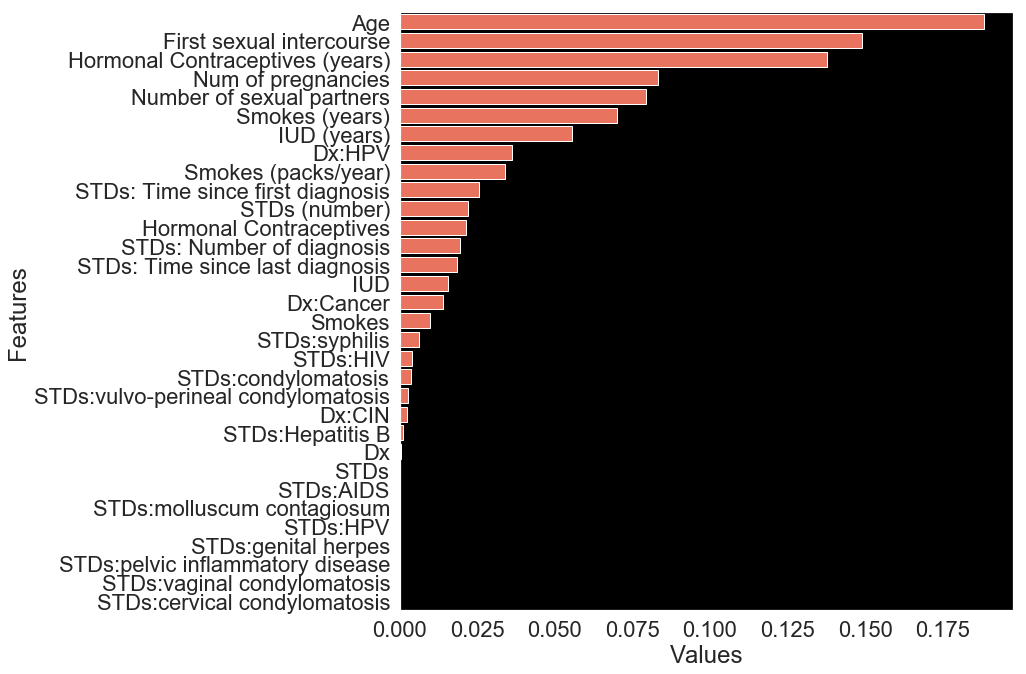

In [58]:
from sklearn.ensemble import RandomForestClassifier


names = x_train.columns
rf = RandomForestClassifier(random_state=30)
rf.fit(x_train,y_train)

result_rf = pd.DataFrame()
result_rf['Features'] = x_train.columns
result_rf ['Values'] = rf.feature_importances_
result_rf.sort_values('Values', inplace = True, ascending = False)
from seaborn import axes_style

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
with axes_style({'axes.facecolor': 'black','axes.grid': False}):
    sns.barplot(x = 'Values',y = 'Features', data=result_rf, color="tomato")
plt.show()

In [ ]:
param_grid = { 'criterion': ['gini', 'entropy'],
             'n_estimators':[100, 120, 140], 
              'min_samples_leaf':[1, 2, 3], 
              'max_depth':[10,15,20]}
model =rf
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf,param_grid,cv=10)
gs.fit(x_train, y_train)

In [ ]:
gs.best_params_

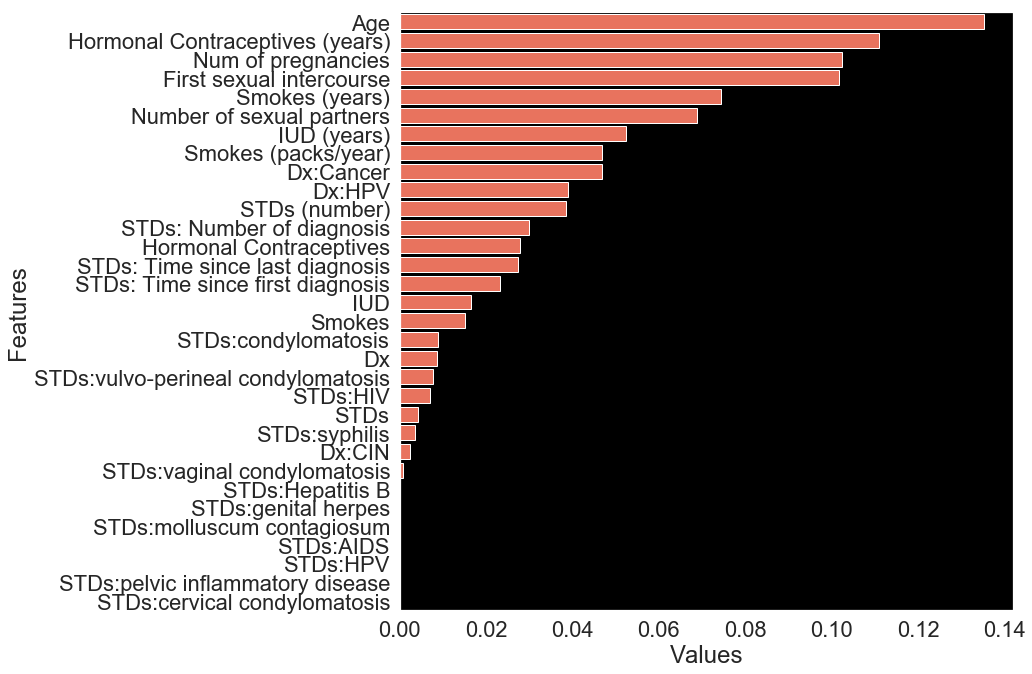

In [59]:
from sklearn.ensemble import RandomForestClassifier
names = x_train.columns
rf = RandomForestClassifier(random_state=30,criterion='gini',
 max_depth= 10,
 min_samples_leaf= 1,
 n_estimators= 100)
rf.fit(x_train,y_train)

result_rf = pd.DataFrame()
result_rf['Features'] = x_train.columns
result_rf ['Values'] = rf.feature_importances_
result_rf.sort_values('Values', inplace = True, ascending = False)
from seaborn import axes_style

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
with axes_style({'axes.facecolor': 'black','axes.grid': False}):
    sns.barplot(x = 'Values',y = 'Features', data=result_rf, color="tomato")
plt.show()

In [60]:
df5=df4[['Age', 'Number of sexual partners', 'First sexual intercourse',
                          'Num of pregnancies',  'Smokes',  'Smokes (years)',  'Smokes (packs/year)',  'Hormonal Contraceptives',
                          'Hormonal Contraceptives (years)',  'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
                          'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                          'STDs:syphilis',
                         'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
                          'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann']]

In [61]:
x=df5.drop("Hinselmann",axis=1)
y=df5['Hinselmann']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [62]:
rf = RandomForestClassifier(random_state=30,criterion='gini',
 max_depth= 10,
 min_samples_leaf= 1,
 n_estimators= 100)
rf.fit(x_train,y_train)
preds=rf.predict(x_test)

In [63]:
from sklearn.metrics import precision_recall_curve,precision_score,accuracy_score,confusion_matrix,recall_score,auc,roc_curve,classification_report
train1=model_score(rf,x_train,y_train)
test1=model_score(rf,x_test,y_test)
p1=print_ppv(y_test,preds)
n1=print_npv(y_test, preds)
r1=print_recall(y_test, preds)
s1=print_specificity(y_test, preds)
f1=print_f1score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, preds)
area_1=auc(fpr, tpr)

## XGBClassifier

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
model2 =XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
model2.fit(x_train, y_train)
preds = model2.predict(x_test)


In [65]:
train2=model_score(model2,x_train,y_train)
test2=model_score(model2,x_test,y_test)
p2=print_ppv(y_test,preds)
n2=print_npv(y_test, preds)
r2=print_recall(y_test, preds)
s2=print_specificity(y_test, preds)
f2=print_f1score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, preds)
area_2=auc(fpr, tpr)

## SVM

In [66]:
from sklearn import svm
model3= svm.SVC(kernel='linear')
model3.fit(x_train, y_train)
preds=model3.predict(x_test)

In [67]:
train3=model_score(model3,x_train,y_train)
test3=model_score(model3,x_test,y_test)
p3=print_ppv(y_test,preds)
n3=print_npv(y_test, preds)
r3=print_recall(y_test, preds)
s3=print_specificity(y_test, preds)
f3=print_f1score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, preds)
area_3=auc(fpr, tpr)

In [68]:
models=['Random_forest','XgbClassifier','svm']
TRAIN_ACCURACY=[train1,train2,train3]
TEST_ACCURACY=[test1,test2,test3]
PPV_OR_PRECISION=[p1,p2,p3]
NPV=[n1,n2,n3]
SENSITIVITY_OR_RECALL=[r1,r2,r3]
SPECIFICITY=[s1,s2,s3]
F1_SCORE=[f1,f2,f3]
AUC=[area_1,area_2,area_3]

In [69]:
cc=pd.DataFrame([models,TRAIN_ACCURACY,TEST_ACCURACY,PPV_OR_PRECISION,NPV,SENSITIVITY_OR_RECALL,SPECIFICITY,F1_SCORE,AUC])

In [70]:
cc=cc.T

In [71]:
cc.columns = ['models','TRAIN_ACCURACY'
            ,'TEST_ACCURACY','PPV_OR_PRECISION','NPV','SENSITIVITY_OR_RECALL','SPECIFICITY','F1_SCORE','AUC']

In [72]:
cc

,models,TRAIN_ACCURACY,TEST_ACCURACY,PPV_OR_PRECISION,NPV,SENSITIVITY_OR_RECALL,SPECIFICITY,F1_SCORE,AUC
0,Random_forest,0.973333,0.976744,1,0,0.976744,NaN,0.988235,0.5
1,XgbClassifier,0.955,0.976744,1,0,0.976744,NaN,0.988235,0.5
2,svm,0.953333,0.976744,1,0,0.976744,NaN,0.988235,0.5


## with smote

In [73]:
x=df4.drop("Hinselmann",axis=1)
y=df4['Hinselmann']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [74]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
x_train_res, y_train_res= sm.fit_sample(x_train, y_train.ravel())

In [75]:
print('After OverSampling, the shape of X_train: {} \n'.format(x_train.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

After OverSampling, the shape of X_train: (600, 32) 

After OverSampling, the shape of y_train: (600,) 

After OverSampling, counts of label '1': 29
After OverSampling, counts of label '0': 571


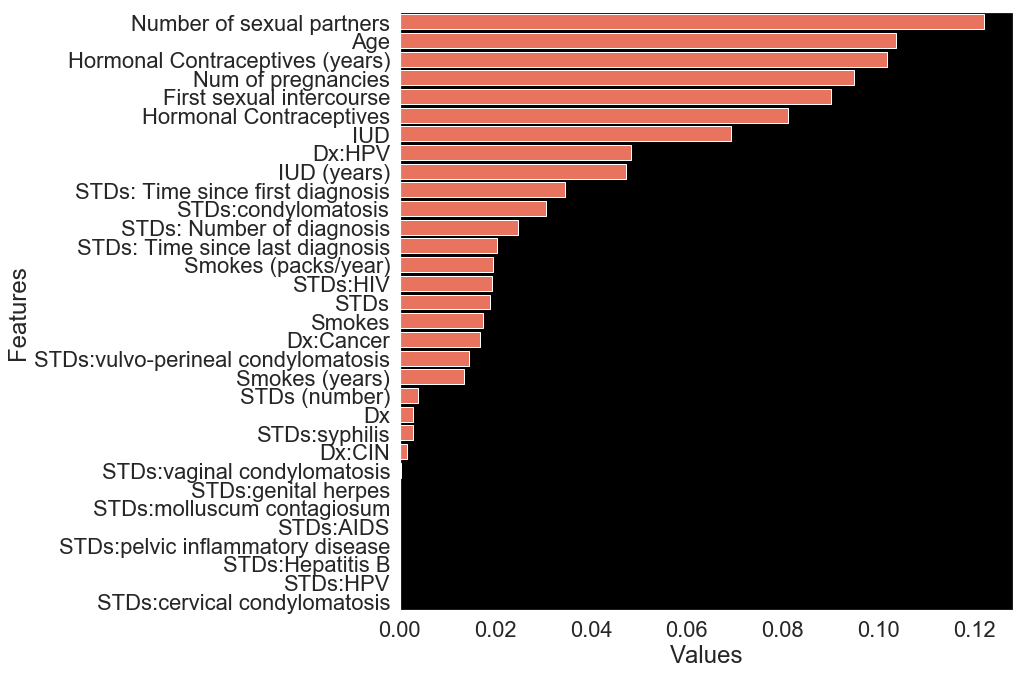

In [76]:
from sklearn.ensemble import RandomForestClassifier

X = df4.drop('Hinselmann', axis =1)
Y = df4["Hinselmann"]
names = x.columns
rf = RandomForestClassifier(random_state=30)
rf.fit(x_train_res,y_train_res)

result_rf = pd.DataFrame()
result_rf['Features'] = x.columns
result_rf ['Values'] = rf.feature_importances_
result_rf.sort_values('Values', inplace = True, ascending = False)
from seaborn import axes_style

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
with axes_style({'axes.facecolor': 'black','axes.grid': False}):
    sns.barplot(x = 'Values',y = 'Features', data=result_rf, color="tomato")
plt.show()

In [ ]:
param_grid = { 'criterion': ['gini', 'entropy'],
             'n_estimators':[100, 120, 140], 
              'min_samples_leaf':[1, 2, 3], 
              'max_depth':[10,15,20]}
model =rf
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf,param_grid,cv=10)
gs.fit(x_train_res, y_train_res)

In [ ]:
gs.best_params_

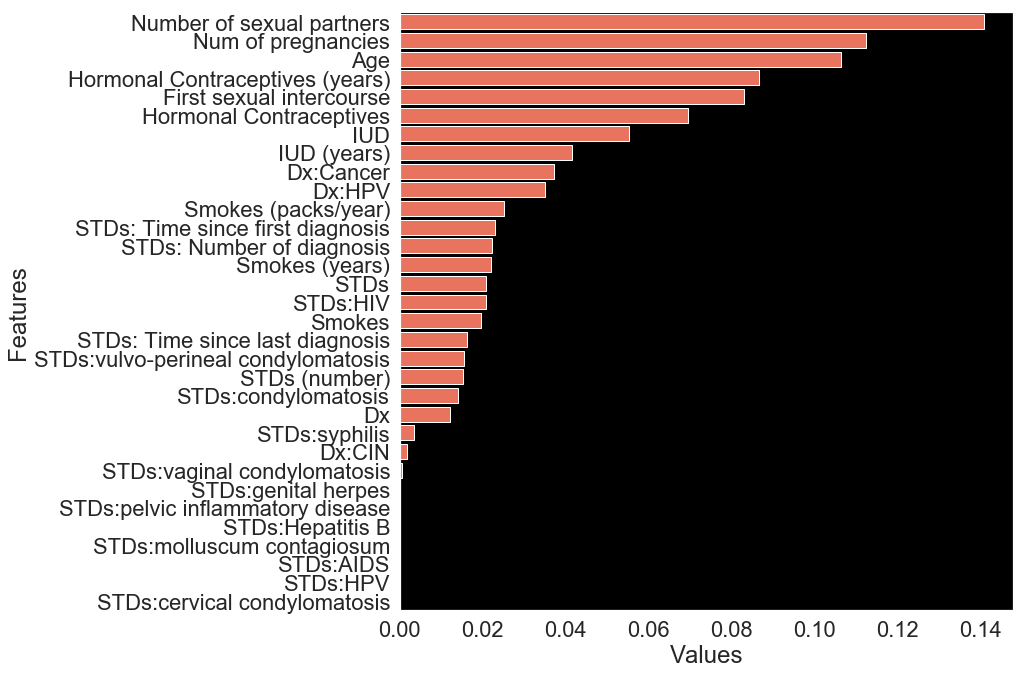

In [77]:
from sklearn.ensemble import RandomForestClassifier
names = x.columns
rf = RandomForestClassifier(random_state=30,criterion='gini',
 max_depth= 20,
 min_samples_leaf= 1,
 n_estimators= 140)
rf.fit(x_train_res,y_train_res)

result_rf = pd.DataFrame()
result_rf['Features'] = x.columns
result_rf ['Values'] = rf.feature_importances_
result_rf.sort_values('Values', inplace = True, ascending = False)
from seaborn import axes_style

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
with axes_style({'axes.facecolor': 'black','axes.grid': False}):
    sns.barplot(x = 'Values',y = 'Features', data=result_rf, color="tomato")
plt.show()

In [78]:
df6=df4[['Age', 'Number of sexual partners', 'First sexual intercourse',
                          'Num of pregnancies',  'Smokes',  'Smokes (years)',  'Smokes (packs/year)',  'Hormonal Contraceptives',
                          'Hormonal Contraceptives (years)',  'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
                          'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                          'STDs:syphilis',
                         'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
                          'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann']]

In [79]:
x=df6.drop("Hinselmann",axis=1)
y=df6['Hinselmann']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [80]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
x_train_res, y_train_res= sm.fit_sample(x_train, y_train.ravel())

In [81]:
rf = RandomForestClassifier(random_state=30,criterion='gini',
 max_depth= 10,
 min_samples_leaf= 1,
 n_estimators= 100)
rf.fit(x_train_res,y_train_res)
preds=rf.predict(x_test)

In [82]:
from sklearn.metrics import precision_recall_curve,precision_score,accuracy_score,confusion_matrix,recall_score,auc,roc_curve,classification_report
train1=model_score(rf,x_train_res,y_train_res)
test1=model_score(rf,x_test,y_test)
p1=print_ppv(y_test,preds)
n1=print_npv(y_test, preds)
r1=print_recall(y_test, preds)
s1=print_specificity(y_test, preds)
f1=print_f1score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, preds)
area_1=auc(fpr, tpr)

In [83]:
area_1

0.4801587301587302

## SVM

In [84]:
from sklearn import svm
model3= svm.SVC(kernel='linear')
model3.fit(x_train_res, y_train_res)
preds=model3.predict(x_test)

In [85]:
train3=model_score(model3,x_train_res,y_train_res)
test3=model_score(model3,x_test,y_test)
p3=print_ppv(y_test,preds)
n3=print_npv(y_test, preds)
r3=print_recall(y_test, preds)
s3=print_specificity(y_test, preds)
f3=print_f1score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, preds)
area_3=auc(fpr, tpr)

In [91]:
models=['Random_forest','svm']
TRAIN_ACCURACY=[train1,train3]
TEST_ACCURACY=[test1,test3]
PPV_OR_PRECISION=[p1,p3]
NPV=[n1,n3]
SENSITIVITY_OR_RECALL=[r1,r3]
SPECIFICITY=[s1,s3]
F1_SCORE=[f1,f3]
AUC=[area_1,area_3]

In [92]:
cc=pd.DataFrame([models,TRAIN_ACCURACY,TEST_ACCURACY,PPV_OR_PRECISION,NPV,SENSITIVITY_OR_RECALL,SPECIFICITY,F1_SCORE,AUC])

In [93]:
cc=cc.T

In [94]:
cc.columns = ['models','TRAIN_ACCURACY'
            ,'TEST_ACCURACY','PPV_OR_PRECISION','NPV','SENSITIVITY_OR_RECALL','SPECIFICITY','F1_SCORE','AUC']

In [95]:
cc

,models,TRAIN_ACCURACY,TEST_ACCURACY,PPV_OR_PRECISION,NPV,SENSITIVITY_OR_RECALL,SPECIFICITY,F1_SCORE,AUC
0,Random_forest,0.97986,0.937984,0.960317,0,0.975806,0,0.968,0.480159
1,svm,0.725919,0.635659,0.634921,0.666667,0.987654,0.0416667,0.772947,0.650794


cc.to_csv('model_svm.csv')